In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df_1=pd.read_csv('downloads/city_data_list_Indore.csv')
df_2=pd.read_csv('downloads/global_data.csv')

In [4]:
df_1.head(2)

,year,city,avg_temp
0,1796,Indore,24.71
1,1797,Indore,25.92


In [5]:
df_2.head(2)

,year,avg_temp
0,1750,8.72
1,1751,7.98


In [7]:
df=pd.merge(df_1,df_2,how='inner',on='year')

In [8]:
df

,year,city,avg_temp_x,avg_temp_y
0,1796,Indore,24.71,8.27
1,1797,Indore,25.92,8.51
2,1798,Indore,23.95,8.67
3,1799,Indore,24.99,8.51
4,1800,Indore,24.94,8.48
...,...,...,...,...
213,2009,Indore,26.41,9.51
214,2010,Indore,26.31,9.70
215,2011,Indore,25.45,9.52
216,2012,Indore,25.39,9.51


In [13]:
df.rename(columns={'avg_temp_x':'avg_temp_indore','avg_temp_y':'avg_temp_global'},inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             218 non-null    int64  
 1   city             218 non-null    object 
 2   avg_temp_indore  211 non-null    float64
 3   avg_temp_global  218 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.9+ KB


AS we can there are some null values in column (avg temperature of city)

In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

year               0
city               0
avg_temp_indore    7
avg_temp_global    0
dtype: int64

There are 7 Null values in avg_temp_indore column we would remove them!

In [22]:
df.dropna(inplace=True)

In [23]:
df.isna().sum()

year               0
city               0
avg_temp_indore    0
avg_temp_global    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211 entries, 0 to 217
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             211 non-null    int64  
 1   city             211 non-null    object 
 2   avg_temp_indore  211 non-null    float64
 3   avg_temp_global  211 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.2+ KB


So know our data is clean 

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,211.0,1907.127962,62.253458,1796.00,1853.50,1908.00,1960.500,2013.00
avg_temp_indore,211.0,24.877725,0.659899,19.60,24.56,24.88,25.285,26.41
avg_temp_global,211.0,8.437630,0.516615,6.94,8.12,8.43,8.730,9.73


In [27]:
df=df.reset_index(drop=True)

In [28]:
df

,year,city,avg_temp_indore,avg_temp_global
0,1796,Indore,24.71,8.27
1,1797,Indore,25.92,8.51
2,1798,Indore,23.95,8.67
3,1799,Indore,24.99,8.51
4,1800,Indore,24.94,8.48
...,...,...,...,...
206,2009,Indore,26.41,9.51
207,2010,Indore,26.31,9.70
208,2011,Indore,25.45,9.52
209,2012,Indore,25.39,9.51


In [58]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,211.0,NaN,NaN,NaN,1907.127962,62.253458,1796.0,1853.5,1908.0,1960.5,2013.0
city,211,1,Indore,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_temp_indore,211.0,NaN,NaN,NaN,24.877725,0.659899,19.6,24.56,24.88,25.285,26.41
avg_temp_global,211.0,NaN,NaN,NaN,8.43763,0.516615,6.94,8.12,8.43,8.73,9.73
global_10y,202.0,NaN,NaN,NaN,8.410975,0.439392,7.557,8.09375,8.2955,8.65975,9.556
indore_10y,202.0,NaN,NaN,NaN,24.857752,0.429796,23.925,24.53,24.8805,25.15125,25.84


<font size='3'>Its interesting to note that highest global temperature average is 9.73,means we have some very cold countries 
that are pulling the average!

<font size='4'>Lets calculate moving average for (10 Years)

In [42]:
df['global_10y']=df.iloc[:,3].rolling(window=10).mean()
df['indore_10y']=df.iloc[:,2].rolling(window=10).mean()

In [43]:
df.head(30)

,year,city,avg_temp_indore,avg_temp_global,global_10y,indore_10y
0,1796,Indore,24.71,8.27,NaN,NaN
1,1797,Indore,25.92,8.51,NaN,NaN
2,1798,Indore,23.95,8.67,NaN,NaN
3,1799,Indore,24.99,8.51,NaN,NaN
4,1800,Indore,24.94,8.48,NaN,NaN
5,1801,Indore,23.86,8.59,NaN,NaN
6,1802,Indore,25.41,8.58,NaN,NaN
7,1803,Indore,25.17,8.50,NaN,NaN
8,1804,Indore,25.51,8.84,NaN,NaN
9,1805,Indore,25.06,8.56,8.551,24.952


# Visualization

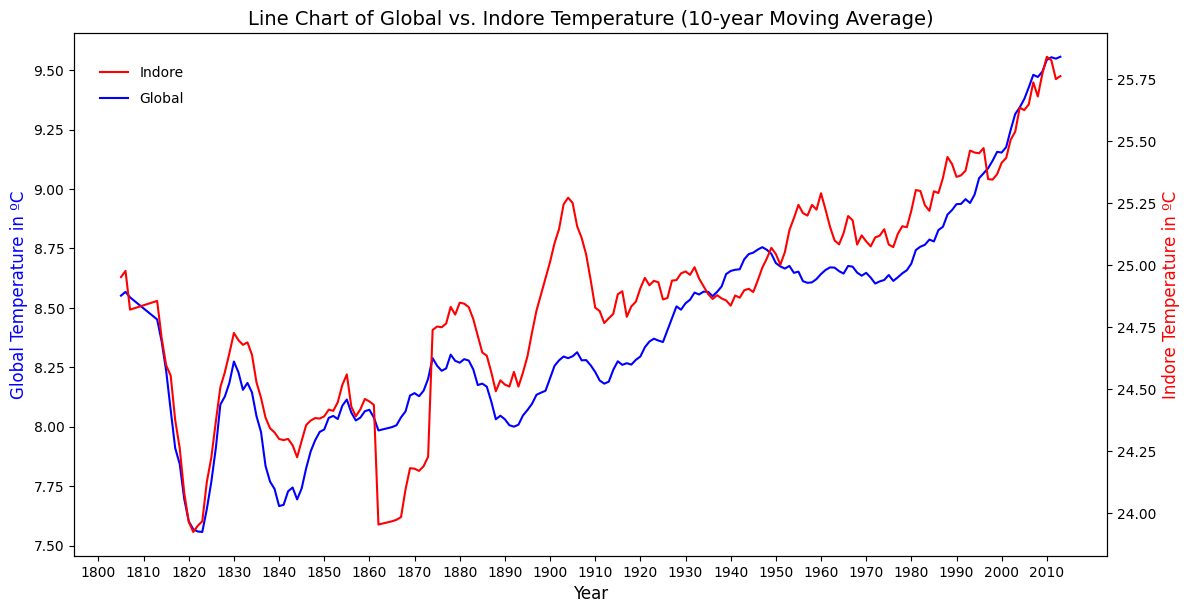

In [49]:
# Plotting line chart
fig, ax = plt.subplots(figsize=[12,6])

# Plotting for Global Temperature
ax.plot(df.year, df.global_10y, label='Global', color='blue')
plt.xticks(np.arange(0, max(df.year)+1, 10))
ax.set_xlabel('Year', size=12)
ax.set_ylabel('Global Temperature in ºC', color='blue', size=12)
ax.tick_params(axis='y', labelcolor='black')
ax.legend(loc=[0.02,0.85], frameon=False)

# Instantiate a second axes that shares the same x-axis
ax1 = ax.twinx()

# Plotting for City Temperature
ax1.plot(df.year, df.indore_10y, label='Indore', color='red')
ax1.set_ylabel('Indore Temperature in ºC', color='red', size=12)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc=[0.02,0.9], frameon=False)

fig.tight_layout()
ax1.set_title("Line Chart of Global vs. Indore Temperature (10-year Moving Average)", size=14)
plt.show()


<h3> Correlation Coefficient</h3>

In [55]:
numeric_df=df.select_dtypes(include=[int,float])
numeric_df.head(3)

,year,avg_temp_indore,avg_temp_global,global_10y,indore_10y
0,1796,24.71,8.27,NaN,NaN
1,1797,25.92,8.51,NaN,NaN
2,1798,23.95,8.67,NaN,NaN


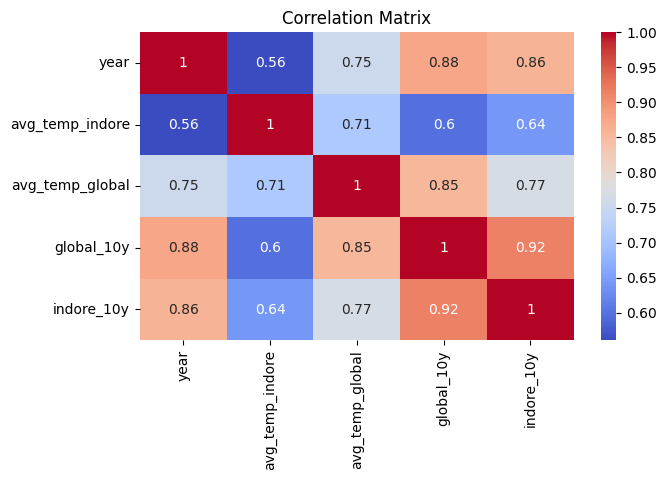

In [57]:
#Heatmap
plt.figure(figsize=(7,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

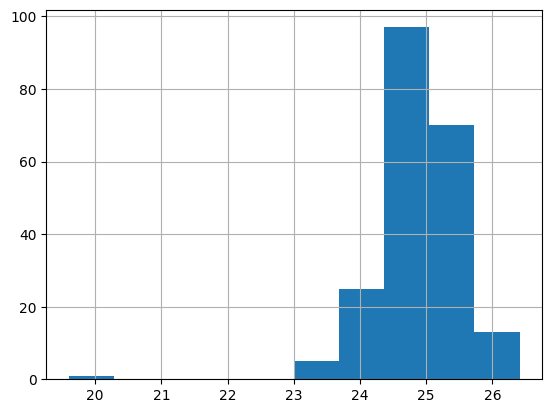

In [60]:
df['avg_temp_indore'].hist()

<Axes: >

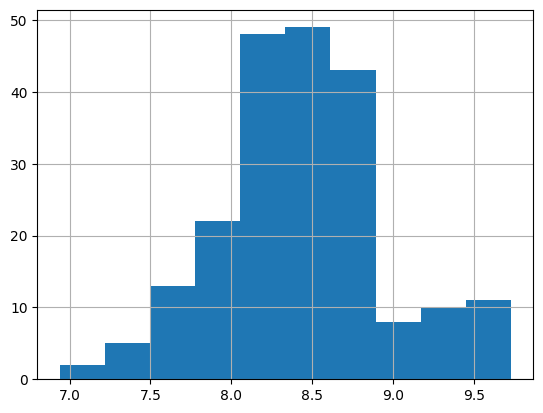

In [61]:
df['avg_temp_global'].hist()